In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Analyse exploratoire des données :


--- Aperçu des données ---
       marque             nom  puissance  longueur  nbPlaces  nbPortes  \
0       Volvo          S80 T6        272         4         5         5   
1  Volkswagen  Touran 2.0 FSI        150         3         7         5   
2  Volkswagen     Polo 1.2 6V         55         1         5         3   
3  Volkswagen  New Beatle 1.8        110         2         5         5   
4  Volkswagen    Golf 2.0 FSI        150         2         5         5   

  couleur  occasion   prix  
0   blanc         0  50500  
1   rouge         0  27340  
2   blanc         1   8540  
3   blanc         1  18641  
4   rouge         1  16029  

--- Statistiques descriptives ---
        puissance  longueur   nbPlaces   nbPortes   occasion          prix
count   32.000000  32.00000  32.000000  32.000000  32.000000     32.000000
mean   151.093750   2.50000   5.250000   4.812500   0.625000  23223.968750
std     87.607394   1.04727   0.672022   0.592289   0.491869  15153.420703
min     55.000000 

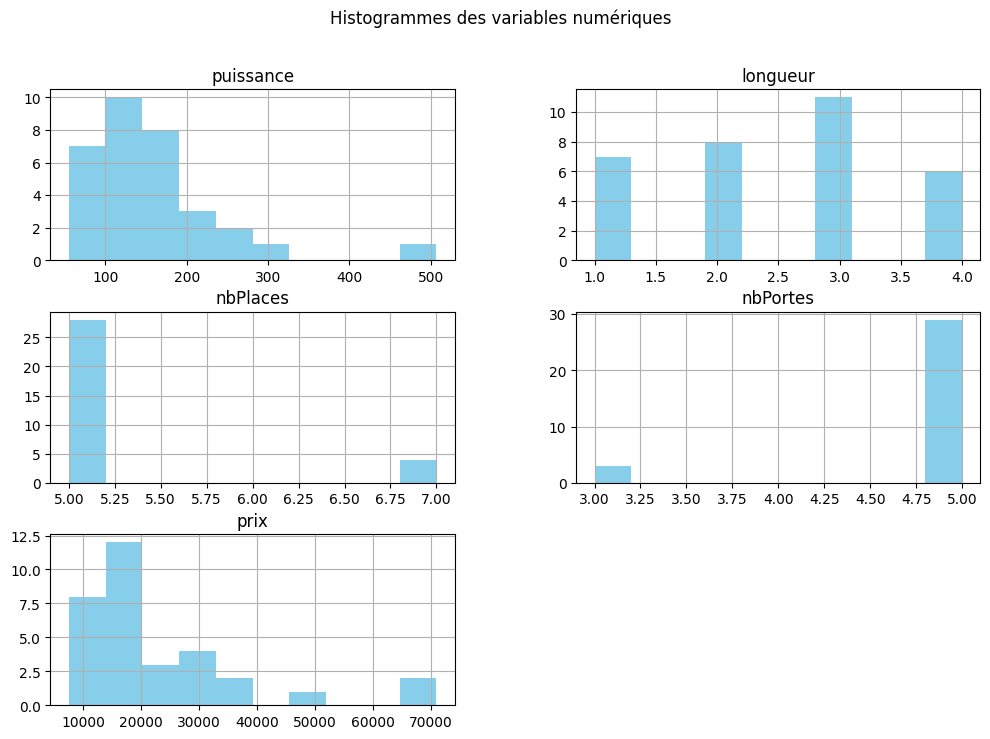

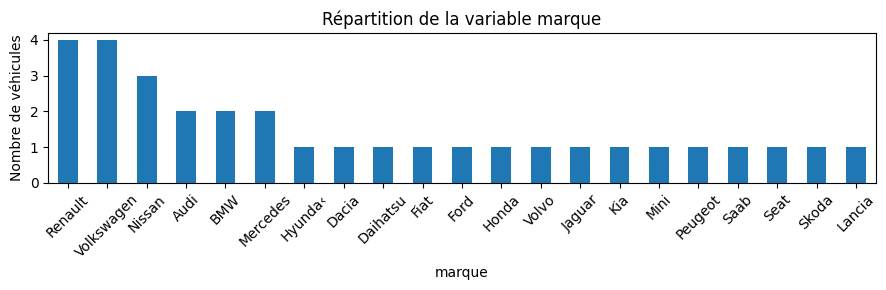

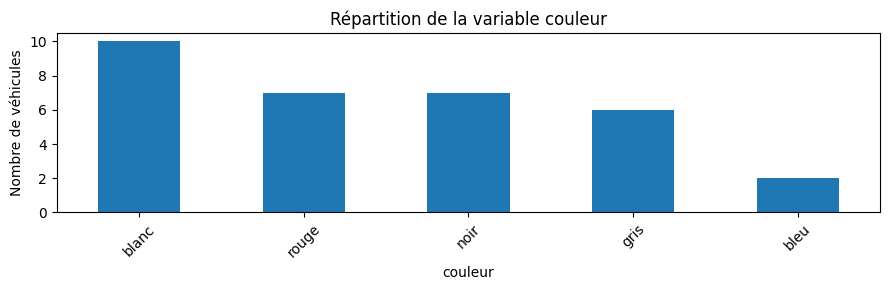

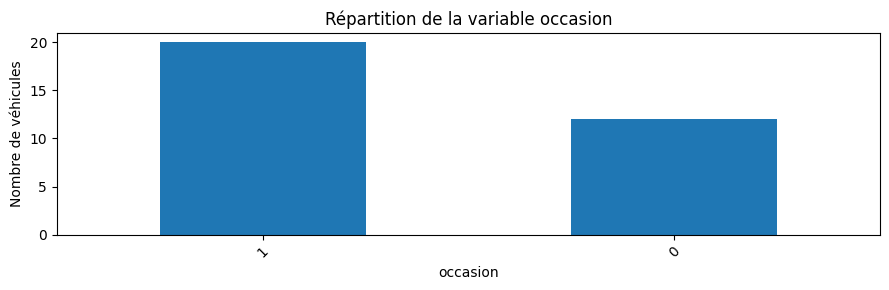

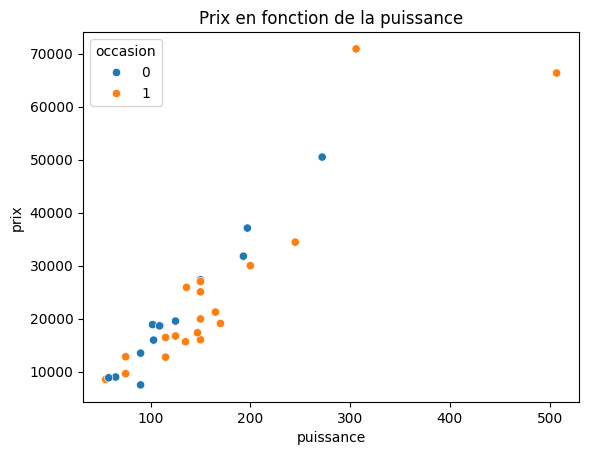

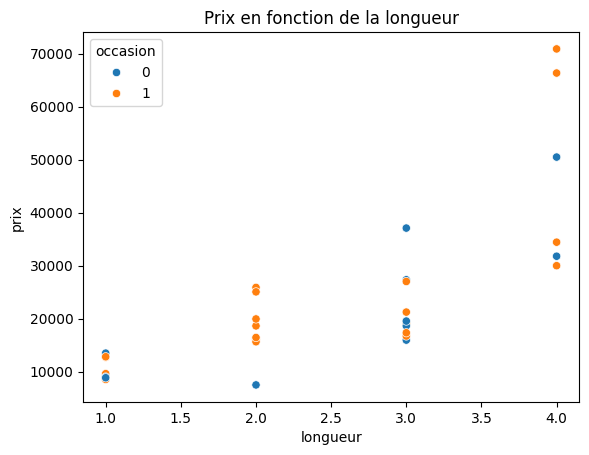

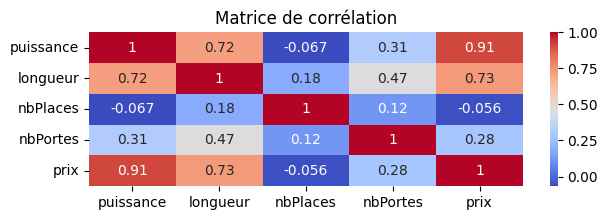

In [21]:

# Charger les données depuis Excel
catalogue = pd.read_excel("Cleaned_data.xlsx", sheet_name="Catalogue")

# Affichage des premières lignes
print("\n--- Aperçu des données ---")
print(catalogue.head())

# 1. Statistiques descriptives
print("\n--- Statistiques descriptives ---")
print(catalogue.describe())

# 2. Valeurs manquantes
print("\n--- Valeurs manquantes ---")
print(catalogue.isnull().sum())

# 3. Types de variables
print("\n--- Types de données ---")
print(catalogue.dtypes)

# 4. Histogrammes pour les variables numériques
numerical_cols = ['puissance', 'longueur', 'nbPlaces', 'nbPortes', 'prix']
catalogue[numerical_cols].hist(bins=10, figsize=(12, 8), color='skyblue')
plt.suptitle("Histogrammes des variables numériques")
plt.show()

# 5. Diagrammes en barres pour les variables catégorielles
categorical_cols = ['marque', 'couleur', 'occasion']
for col in categorical_cols:
    plt.figure(figsize=(9,3))
    catalogue[col].value_counts().plot(kind='bar')
    plt.title(f"Répartition de la variable {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de véhicules")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. Nuages de points
sns.scatterplot(data=catalogue, x='puissance', y='prix', hue='occasion')
plt.title("Prix en fonction de la puissance")
plt.show()

sns.scatterplot(data=catalogue, x='longueur', y='prix', hue='occasion')
plt.title("Prix en fonction de la longueur")
plt.show()

# 7. Matrice de corrélation
plt.figure(figsize=(7,2))
sns.heatmap(catalogue[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [22]:
print("\n--- Aperçu des données ---")
catalogue.head()


--- Aperçu des données ---


,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,4,5,5,blanc,0,50500
1,Volkswagen,Touran 2.0 FSI,150,3,7,5,rouge,0,27340
2,Volkswagen,Polo 1.2 6V,55,1,5,3,blanc,1,8540
3,Volkswagen,New Beatle 1.8,110,2,5,5,blanc,1,18641
4,Volkswagen,Golf 2.0 FSI,150,2,5,5,rouge,1,16029


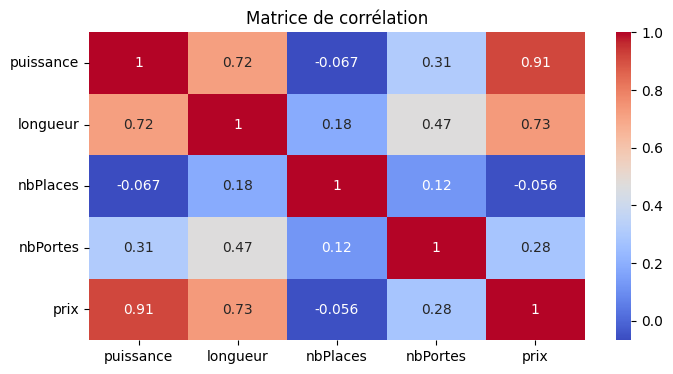

In [23]:
# 7. Matrice de corrélation
plt.figure(figsize=(8,4))
sns.heatmap(catalogue[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


# 2. Identification des categories de véhicules :

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

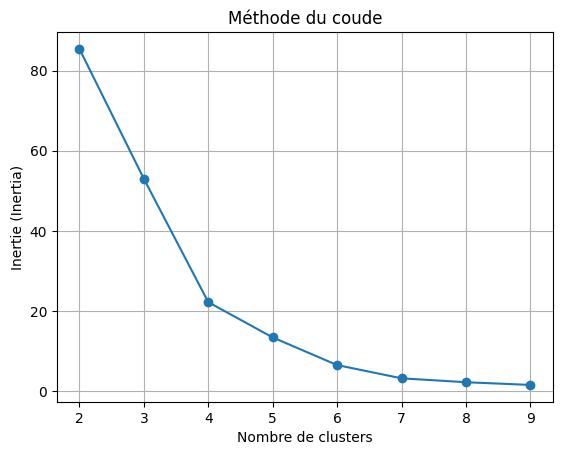

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          puissance  longueur  nbPlaces  nbPortes
cluster                                          
0        135.750000  3.000000       7.0       5.0
1        124.526316  2.157895       5.0       5.0
2         67.666667  1.000000       5.0       3.0
3        287.166667  4.000000       5.0       5.0


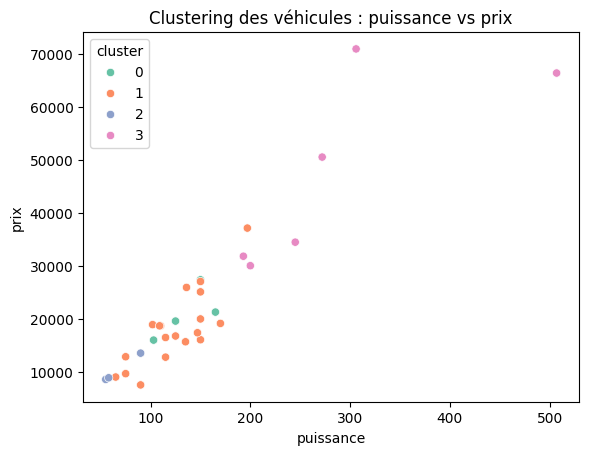

In [24]:
# Colonnes sélectionnées pour le clustering
features = ['puissance', 'longueur', 'nbPlaces', 'nbPortes']
X = catalogue[features]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Détermination du nombre optimal de clusters (méthode du coude)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (Inertia)')
plt.title('Méthode du coude')
plt.grid()
plt.show()


# Clustering avec le k choisi 
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
catalogue['cluster'] = kmeans.fit_predict(X_scaled)
# Moyennes par cluster
cluster_summary = catalogue.groupby('cluster')[features].mean()
print(cluster_summary)

#Visualisation
sns.scatterplot(data=catalogue, x='puissance', y='prix', hue='cluster', palette='Set2')
plt.title("Clustering des véhicules : puissance vs prix")
plt.show()


# 3. Application des catégories de véhicules définies aux données des Immatriculations 

In [25]:
# Étape 1 : Charger les deux datasets
immat = pd.read_excel("Cleaned_data.xlsx", sheet_name="Immatriculations_small")

# S'assurer que les noms sont en minuscules et sans espaces parasites 
immat['nom'] = immat['nom'].str.strip().str.lower()
catalogue['nom'] = catalogue['nom'].str.strip().str.lower()

# Jointure sur 'nom' pour récupérer le cluster
immat_clustered = pd.merge(immat, 
                           catalogue[['nom', 'cluster']], 
                           on='nom', 
                           how='left')

# Vérification
nb_non_classés = immat_clustered['cluster'].isnull().sum()
print(f"Nombre de véhicules immatriculés sans cluster attribué : {nb_non_classés}")

# Affichage de quelques lignes
print(immat_clustered.head(10))
#  Enregistrer pour la suite
immat_clustered.to_excel("Immatriculations_avec_cluster.xlsx", index=False)

Nombre de véhicules immatriculés sans cluster attribué : 0
  immatriculation     nom  cluster
0      9037 LB 45  a2 1.4        1
1       528 NN 51  a2 1.4        1
2      3512 EK 20  a2 1.4        1
3      9191 YR 57  a2 1.4        1
4      7642 RX 34  a2 1.4        1
5      5564 QX 23  a2 1.4        1
6      1353 KG 40  a2 1.4        1
7       789 JM 61  a2 1.4        1
8      1301 JK 23  a2 1.4        1
9      6659 EY 41  a2 1.4        1


In [26]:
import pandas as pd

# Charger le fichier Clients
clients = pd.read_excel("Cleaned_data.xlsx", sheet_name="Clients")

# Charger le fichier Immatriculations (avec cluster déjà présent)
immat = pd.read_excel("Immatriculations_avec_cluster.xlsx")

# Normaliser les colonnes pour éviter les erreurs de jointure
clients['immatriculation'] = clients['immatriculation'].str.strip().str.lower()
immat['immatriculation'] = immat['immatriculation'].str.strip().str.lower()

# Jointure entre Clients et Immatriculations
clients_full = pd.merge(clients, 
                        immat[['immatriculation', 'nom', 'cluster']], 
                        on='immatriculation', 
                        how='left')

# Vérification
print(clients_full.head())
print(f"{clients_full['cluster'].isnull().sum()} clients n'ont pas de catégorie de véhicule.")


    age sexe taux situationFamiliale  nbEnfantsAcharge 2eme voiture  \
0  42.0    M  483                 EC               1.0        False   
1  33.0    M  534                 EC               1.0        False   
2  41.0    M  582                 EC               1.0        False   
3  79.0    M  432                 EC               1.0        False   
4  40.0    M  400                 EC               1.0        False   

  immatriculation               nom  cluster  
0      3483 fn 21            s80 t6        3  
1      7747 ht 70                m5        3  
2      3352 aq 17                m5        3  
3      5565 ge 78          9.3 1.8t        1  
4      2975 bl 85  vel satis 3.5 v6        3  
0 clients n'ont pas de catégorie de véhicule.


In [27]:
clients_full.to_excel("Clients_avec_Cluster.xlsx", index=False)


# 5. Création d’un modèle de classification supervisée pour la prédiction de la catégorie de véhicules

C:\Users\dell\AppData\Local\Temp\ipykernel_25424\1677253686.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['2eme voiture'] = X['2eme voiture'].fillna(0).astype(int)
C:\Users\dell\AppData\Local\Temp\ipykernel_25424\1677253686.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['nbEnfantsAcharge'] = X['nbEnfantsAcharge'].replace(-1, 0)



 Modèle : DecisionTree (default)
Accuracy : 0.7610
Rapport de classification :
              precision    recall  f1-score   support

           1       0.78      0.80      0.79       177
           2       0.40      0.36      0.38        22
           3       0.80      0.77      0.79       119

    accuracy                           0.76       318
   macro avg       0.66      0.65      0.65       318
weighted avg       0.76      0.76      0.76       318

Matrice de confusion :


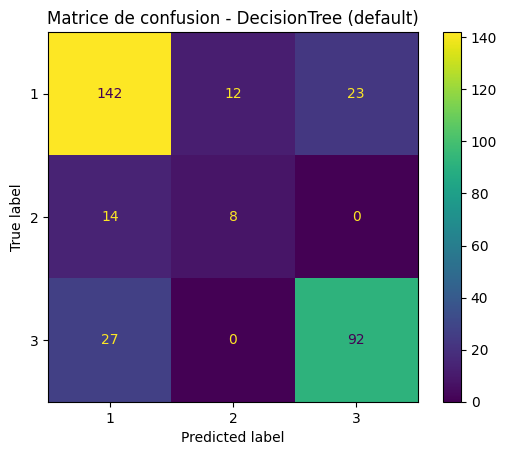


 Modèle : DecisionTree (max_depth=5)
Accuracy : 0.7830
Rapport de classification :
              precision    recall  f1-score   support

           1       0.73      0.95      0.83       177
           2       0.00      0.00      0.00        22
           3       0.95      0.67      0.79       119

    accuracy                           0.78       318
   macro avg       0.56      0.54      0.54       318
weighted avg       0.77      0.78      0.76       318

Matrice de confusion :


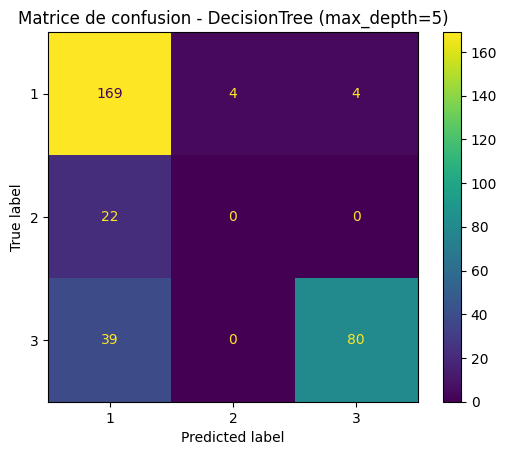


 Modèle : RandomForest (100 trees)
Accuracy : 0.7736
Rapport de classification :
              precision    recall  f1-score   support

           1       0.75      0.88      0.81       177
           2       0.67      0.27      0.39        22
           3       0.82      0.71      0.76       119

    accuracy                           0.77       318
   macro avg       0.75      0.62      0.65       318
weighted avg       0.77      0.77      0.76       318

Matrice de confusion :


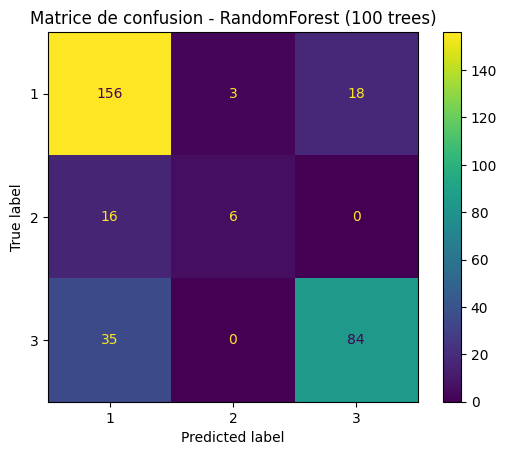


 Modèle : RandomForest (200 trees)
Accuracy : 0.7956
Rapport de classification :
              precision    recall  f1-score   support

           1       0.74      0.97      0.84       177
           2       0.50      0.05      0.08        22
           3       0.94      0.68      0.79       119

    accuracy                           0.80       318
   macro avg       0.73      0.56      0.57       318
weighted avg       0.80      0.80      0.77       318

Matrice de confusion :


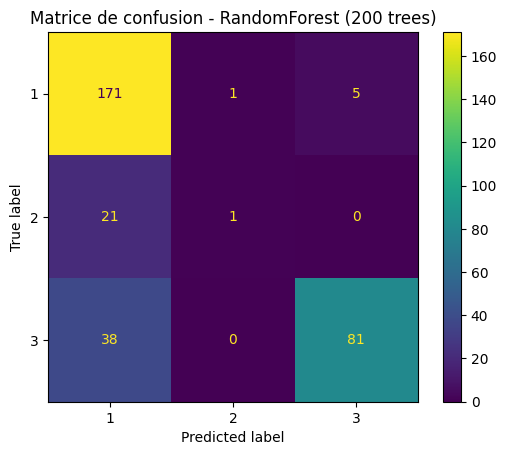


 Modèle : SVM (linéaire)
Accuracy : 0.7358
Rapport de classification :
              precision    recall  f1-score   support

           1       0.72      0.85      0.78       177
           2       0.00      0.00      0.00        22
           3       0.76      0.71      0.73       119

    accuracy                           0.74       318
   macro avg       0.49      0.52      0.50       318
weighted avg       0.69      0.74      0.71       318

Matrice de confusion :


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

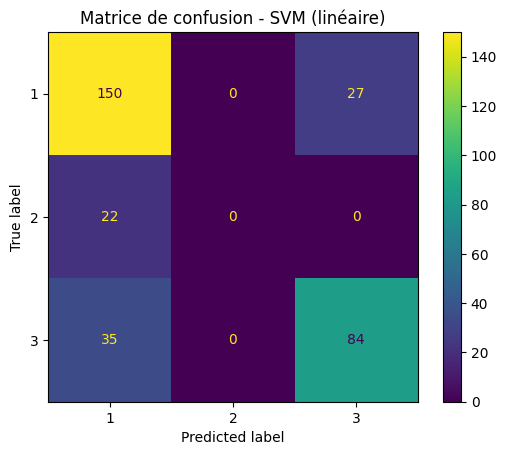


 Modèle : SVM (rbf)
Accuracy : 0.7925
Rapport de classification :
              precision    recall  f1-score   support

           1       0.73      0.98      0.84       177
           2       0.00      0.00      0.00        22
           3       0.96      0.66      0.78       119

    accuracy                           0.79       318
   macro avg       0.57      0.55      0.54       318
weighted avg       0.77      0.79      0.76       318

Matrice de confusion :


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

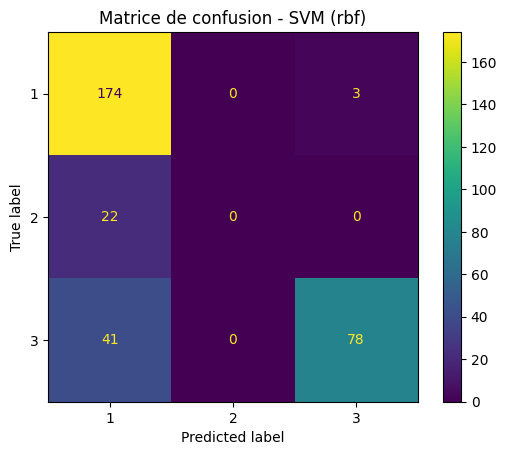


Comparatif des modèles :
RandomForest (200 trees)       -> Accuracy: 0.7956
SVM (rbf)                      -> Accuracy: 0.7925
DecisionTree (max_depth=5)     -> Accuracy: 0.7830
RandomForest (100 trees)       -> Accuracy: 0.7736
DecisionTree (default)         -> Accuracy: 0.7610
SVM (linéaire)                 -> Accuracy: 0.7358


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 1. Chargement des données
clients = pd.read_excel("Clients_avec_Cluster.xlsx")

# 2. Nettoyage des données
clients['taux'] = clients['taux'].replace('?', np.nan)
clients['taux'] = pd.to_numeric(clients['taux'], errors='coerce')
clients['cluster'] = clients['cluster'].astype(int)

# Variables explicatives
X = clients[['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', '2eme voiture']]
y = clients['cluster']

# Nettoyage des valeurs manquantes ou invalides
X['2eme voiture'] = X['2eme voiture'].fillna(0).astype(int)
X['nbEnfantsAcharge'] = X['nbEnfantsAcharge'].replace(-1, 0)

# Colonnes numériques et catégorielles
num_cols = ['age', 'taux', 'nbEnfantsAcharge', '2eme voiture']
cat_cols = ['sexe', 'situationFamiliale']

# 3. Pipeline de prétraitement
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first'))
    ]), cat_cols)
])

# 4. Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modèles à tester
models = {
    "DecisionTree (default)": DecisionTreeClassifier(random_state=42),
    "DecisionTree (max_depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42),
    "RandomForest (100 trees)": RandomForestClassifier(n_estimators=100, random_state=42),
    "RandomForest (200 trees)": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "SVM (linéaire)": SVC(kernel='linear', C=1),
    "SVM (rbf)": SVC(kernel='rbf', C=1, gamma='scale')
}

# 6. Tester et comparer les modèles
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Modèle : {name}")
    print(f"Accuracy : {acc:.4f}")
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred))
    
    # Matrice de confusion
    print("Matrice de confusion :")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Matrice de confusion - {name}")
    plt.show()
    
    results.append((name, acc))

# 7. Résumé final
print("\nComparatif des modèles :")
for name, acc in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"{name:30s} -> Accuracy: {acc:.4f}")


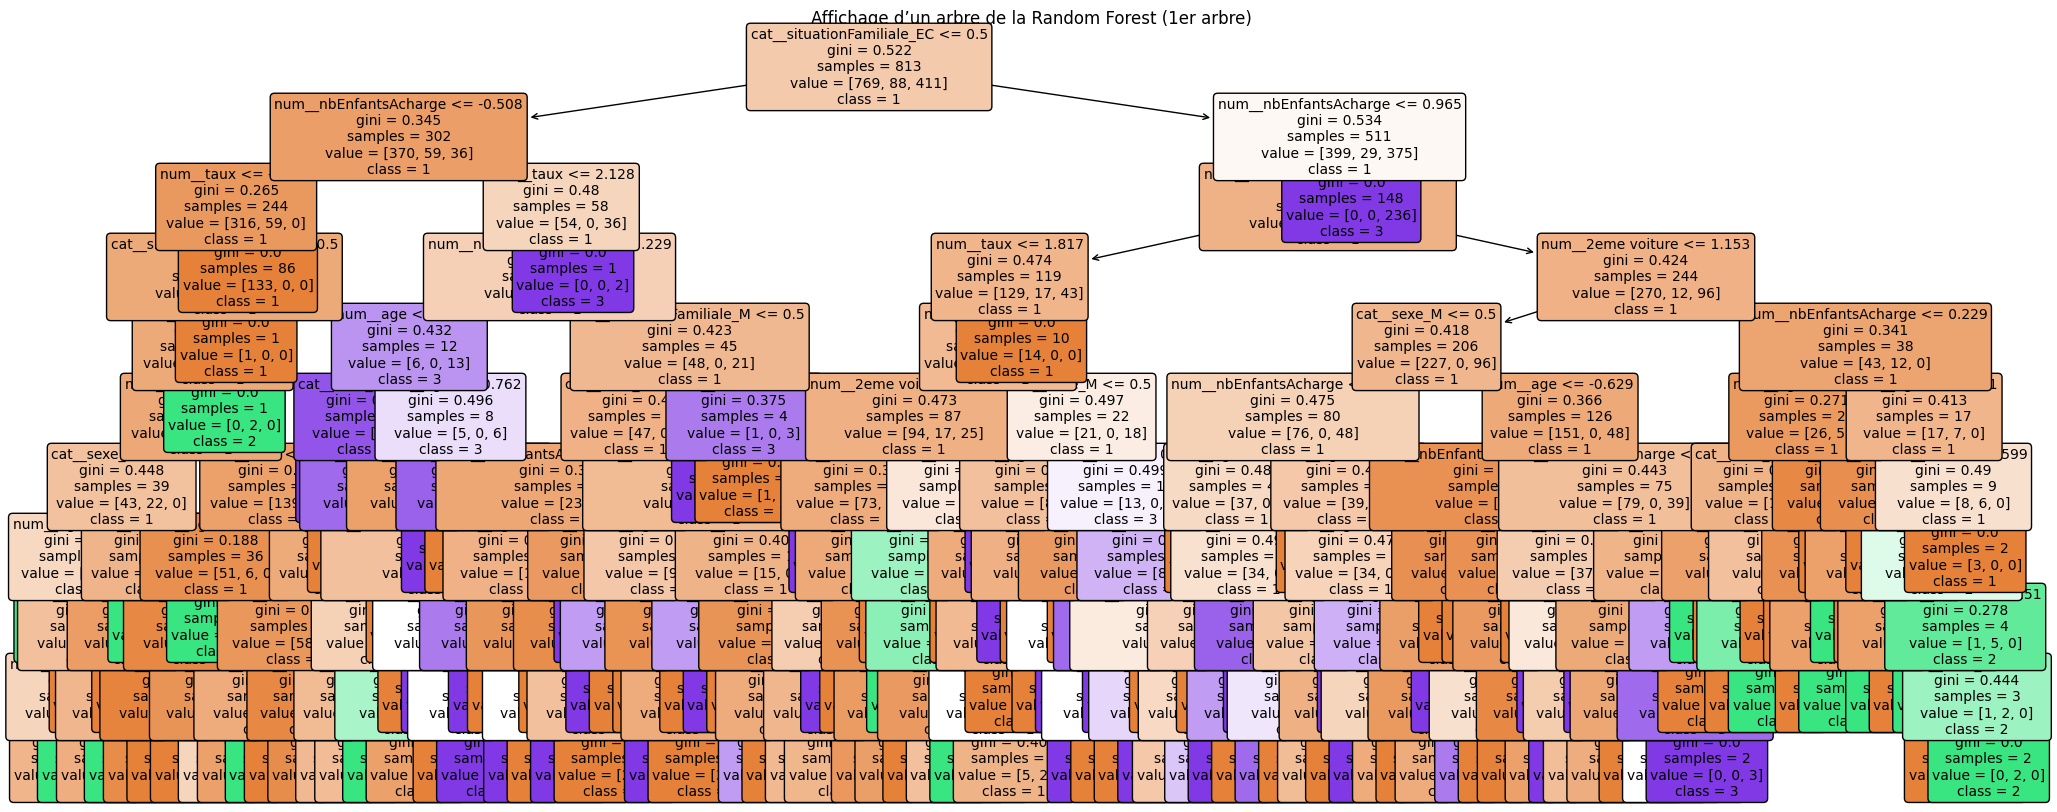

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. Extraire le modèle Random Forest avec les meilleurs paramètres
best_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# 2. Créer le pipeline complet
from sklearn.pipeline import Pipeline

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# 3. Entraîner le pipeline
pipeline_rf.fit(X_train, y_train)

# 4. Extraire le premier arbre de la forêt
first_tree = pipeline_rf.named_steps['classifier'].estimators_[0]

# 5. Récupérer les noms des features après transformation
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

# 6. Afficher l’arbre
plt.figure(figsize=(25, 10))
plot_tree(first_tree,
          filled=True,
          feature_names=feature_names,
          class_names=[str(c) for c in np.unique(y)],
          rounded=True,
          fontsize=10)
plt.title("Affichage d’un arbre de la Random Forest (1er arbre)")
plt.show()


In [30]:
# Chargement du fichier marketing
marketing = pd.read_excel("Cleaned_data.xlsx", sheet_name="Marketing")


# Colonnes à utiliser
X_marketing = marketing[['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', '2eme voiture']]

# Prédictions des clusters pour les clients Marketing
marketing['cluster_pred'] = pipeline_rf.predict(X_marketing)

# Exemple : mapping des clusters en catégories (à adapter selon ton clustering)
cluster_labels = {
    0: "Citadine",
    1: "Familiale",
    2: "SUV",
    3: "Sportive"
}

marketing['catégorie_recommandée'] = marketing['cluster_pred'].map(cluster_labels)

# Sauvegarder les résultats
marketing.to_excel("Marketing_avec_predictions.xlsx", index=False)


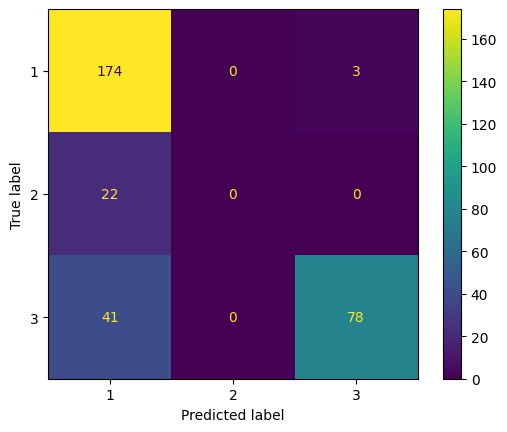

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [32]:
mrkt = pd.read_excel("Marketing_avec_predictions.xlsx")
mrkt.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,cluster_pred,catégorie_recommandée
0,21,F,1396,C,0,False,1,Familiale
1,35,M,223,C,0,False,1,Familiale
2,48,M,401,C,0,False,1,Familiale
3,26,F,420,EC,3,True,3,Sportive
4,80,M,530,EC,3,False,3,Sportive
